In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [79]:
results_dir='results/delta10-2/data1/'
data=pd.read_csv(results_dir+'data.csv')
trace=pd.read_csv(results_dir+'trace_IG50_0.csv')

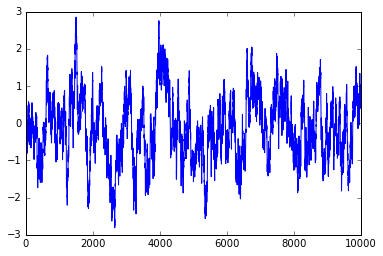

In [80]:
plt.plot(data['x'])

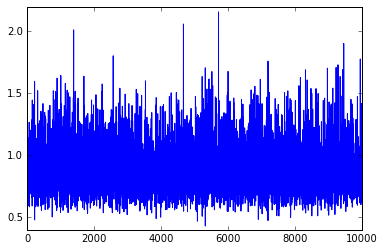

In [81]:
plt.plot(trace['D'])

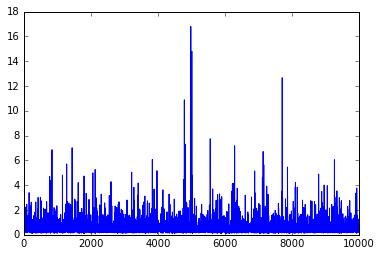

In [82]:
plt.plot(trace['A'])

D mean:  0.903034414940144 std:  0.18597830496268597
D alpha:  25.576755143427775 beta:  22.193655702072476


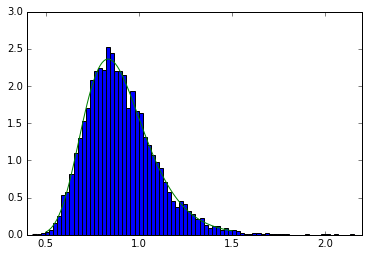

In [95]:
from scipy.stats import invgamma,gamma
xg=np.linspace(0.5,1.5,100)
hist_D=plt.hist(trace['D'],bins='auto',normed=1)
mean_D=trace['D'].mean()
std_D=trace['D'].std()
print('D mean: ',mean_D,'std: ',std_D)
alpha_D=mean_D**2/std_D**2 +2
beta_D=mean_D*(alpha_D-1)
print('D alpha: ',alpha_D,'beta: ',beta_D)
gy=invgamma.pdf(xg,alpha_D,scale=beta_D)
plt.plot(xg,gy)

mean:  0.6209924492044231 std:  0.6349693738440457
alpha:  0.9564605935027263 scale:  0.6492608826990351


(0, 4)

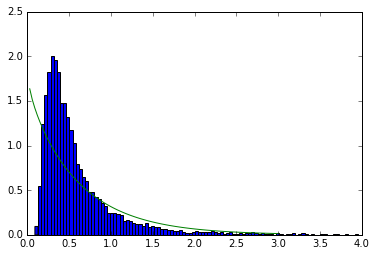

In [120]:
hist_A=plt.hist(trace['A'],bins='auto',normed=1)
xA=np.linspace(0,3,100)
A=trace['A']
mean_A=A.mean()
std_A=A.std()
print('mean: ',mean_A,'std: ',std_A)
alpha_A=mean_A**2/std_A**2
scale_A=mean_A/alpha_A
print('alpha: ',alpha_A,'scale: ',scale_A)
gy=gamma.pdf(xA,alpha_A,scale=scale_A)
plt.plot(xA,gy)
plt.xlim((0,4))

mean:  0.6209924492044231 std:  0.6349693738440457
A alpha:  2.9564605935027264 beta:  0.3174060603452465


(0, 4)

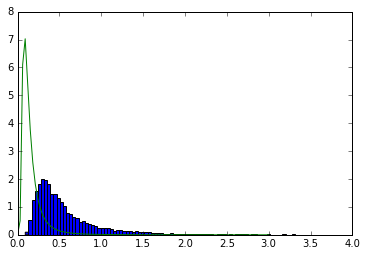

In [98]:
hist_A=plt.hist(trace['A'],bins='auto',normed=1)
xA=np.linspace(0,3,100)
A=trace['A']
mean_A=A.mean()
std_A=A.std()
print('mean: ',mean_A,'std: ',std_A)
alpha_A=(mean_A**2/std_A**2)+2
beta_A=mean_A/(alpha_A-1)
print('A alpha: ',alpha_A,'beta: ',beta_A)
gy=invgamma.pdf(xA,alpha_A,scale=beta_A)
plt.plot(xA,gy)
plt.xlim((0,4))

[[Model]]
    Model(mygamma)
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 446
    # variables        = 2
    chi-square         = 1.084
    reduced chi-square = 0.002
    Akaike info crit   = -2678.810
    Bayesian info crit = -2670.609
[[Variables]]
    alpha:   3.55433844 +/- 0.064133 (1.80%) (init= 0.9564606)
    scale:   0.13125103 +/- 0.002683 (2.04%) (init= 0.6492609)
[[Correlations]] (unreported correlations are <  0.100)
    C(alpha, scale)              = -0.950 



(0, 4)

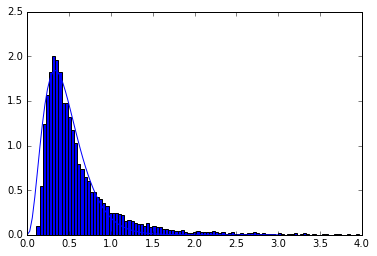

In [122]:
import lmfit as lm
def mygamma(x,alpha, scale):
    return gamma.pdf(x,alpha, scale=scale)

gModel=lm.Model(mygamma)
hist,bin_edges=np.histogram(A,bins='auto', density=True)
delta=bin_edges[1]-bin_edges[0]
x=bin_edges[:-1]+delta/2

result = gModel.fit(hist, x=x, alpha=alpha_A, scale=scale_A)
print(result.fit_report())

plt.bar(x,hist, width=delta)

xA=np.linspace(0,3,100)
gy=gamma.pdf(xA,result.best_values['alpha'],scale=result.best_values['scale'])
plt.plot(xA,gy)
plt.xlim(0,4)

(0, 20)

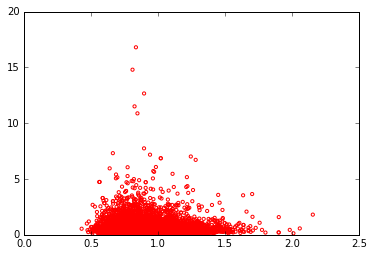

In [86]:
plt.scatter(trace['D'],trace['A'], s=10,facecolors='none', edgecolors='r')
plt.ylim((0,20))